<a href="https://colab.research.google.com/github/GeminiNetSailor/Data-science-and-analytics/blob/main/4.2%20Actividad%204.%20EDA/Actividad4EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: David A. Serrano Garcia
*   MATRÍCULA: A01795935

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 4/Actividad4_EDA"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


**¿Cuántas columnas son numéricas y cuántas cualitativas?**

> *dtypes: float64(3), int64(5), object(4)*

* Hay 8 columnas numéricas
* Hay 4 columnas cualitativas




 2. Determina el porcentaje de valores faltantes por columna.

In [ ]:
missing_percentage = df.isna().mean() * 100

# Convertir la serie de porcentajes en un DataFrame para una visualización más clara
missing_percentage_df = missing_percentage.reset_index()
missing_percentage_df.columns = ['Columna', 'Porcejaje de Valores Faltantes']

missing_percentage_df.sort_values(by='Porcejaje de Valores Faltantes', ascending=False)

,Columna,Porcejaje de Valores Faltantes
7,loan_int_rate,9.563856
3,person_emp_length,2.747000
0,person_age,0.000000
1,person_income,0.000000
2,person_home_ownership,0.000000
4,loan_intent,0.000000
5,loan_grade,0.000000
6,loan_amnt,0.000000
8,loan_status,0.000000
9,loan_percent_income,0.000000


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [ ]:
# Obtener las estadísticas descriptivas para las variables numéricas
df_numeric = df.select_dtypes(include=['int64', 'float64'])
descriptive_stats = df_numeric.describe()

# Agregar las estadísticas de asimetría y curtosis
descriptive_stats.loc['skew'] = df_numeric.skew()
descriptive_stats.loc['kurtosis'] = df_numeric.kurtosis()

descriptive_stats

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000
skew,2.581393,3.286535e+01,2.614455,1.192477,0.208550,1.364888,1.064669,1.661790
kurtosis,18.560825,2.693273e+03,43.722338,1.423565,-0.671609,-0.137088,1.223687,3.716194


# Clasifica las variables person_age y loan_in_rate según los valores observados de asimetría y curtosis

**Clasificación:**


*   **person_age**: (snew 2.58) es positivamente sesgada (*asimetría positiva*) y (kurtosis 18.56) leptocúrtica.
*   **loan_int_rate**: (snew 0.208550) es levemente positivamente sesgada (*asimetría positiva casi cero*) y (kurtosis -0.67) platicúrtica.


> ***Asimetría (Skewness)***:
>
> **Negativa o Izquierda**: Los datos se inclinan hacia la izquierda del pico de la distribución.
>
> **Cero**: La distribución es simétrica, similar a una distribución normal.
>
>**Positiva o Derecha**: Los datos se inclinan hacia la derecha del pico de la distribución.

> ***Curtosis (kurtosis)***:
>
> **Leptocúrtica (> 3)**: La distribución tiene colas más pesadas y un pico más agudo que una distribución normal.
>
> **Mesocúrtica (~3)**: La distribución tiene un pico y colas similares a una distribución normal.
>
>**Platicúrtica (< 3)**: La distribución es más plana que una distribución normal con colas más ligeras.




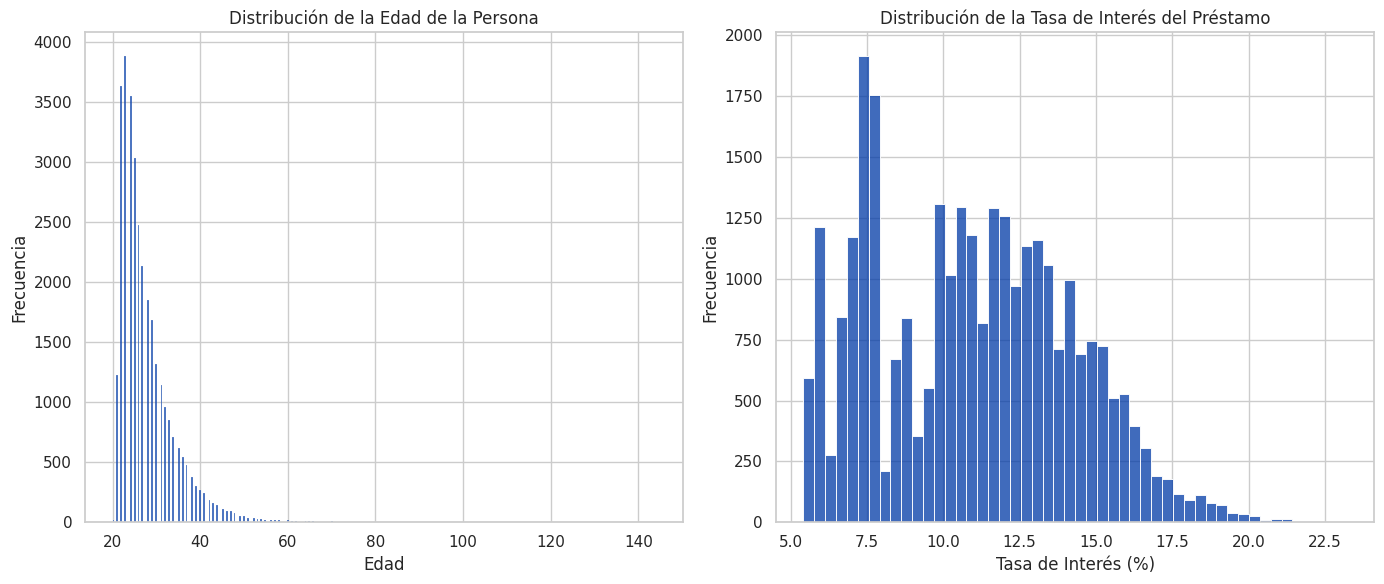

In [ ]:
# Clasifica las variables person_age y loan_in_rate según los valores observados de asimetría y curtosis?

# Configurar estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura con dos subplots para histogramas
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histograma para person_age
ax[0].set_title('Distribución de la Edad de la Persona')
ax[0].set_xlabel('Edad')
ax[0].set_ylabel('Frecuencia')
sns.histplot(df['person_age'], ax=ax[0], color="#0039A6")

# Histograma para loan_int_rate
ax[1].set_title('Distribución de la Tasa de Interés del Préstamo')
ax[1].set_xlabel('Tasa de Interés (%)')
ax[1].set_ylabel('Frecuencia')
sns.histplot(df['loan_int_rate'].dropna(), ax=ax[1], color="#0039A6")

# Ajustar el layout para evitar superposiciones - tight_layout() -
# tight_layout(): Adjust the padding between and around subplots.
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
plt.tight_layout()
plt.show()

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

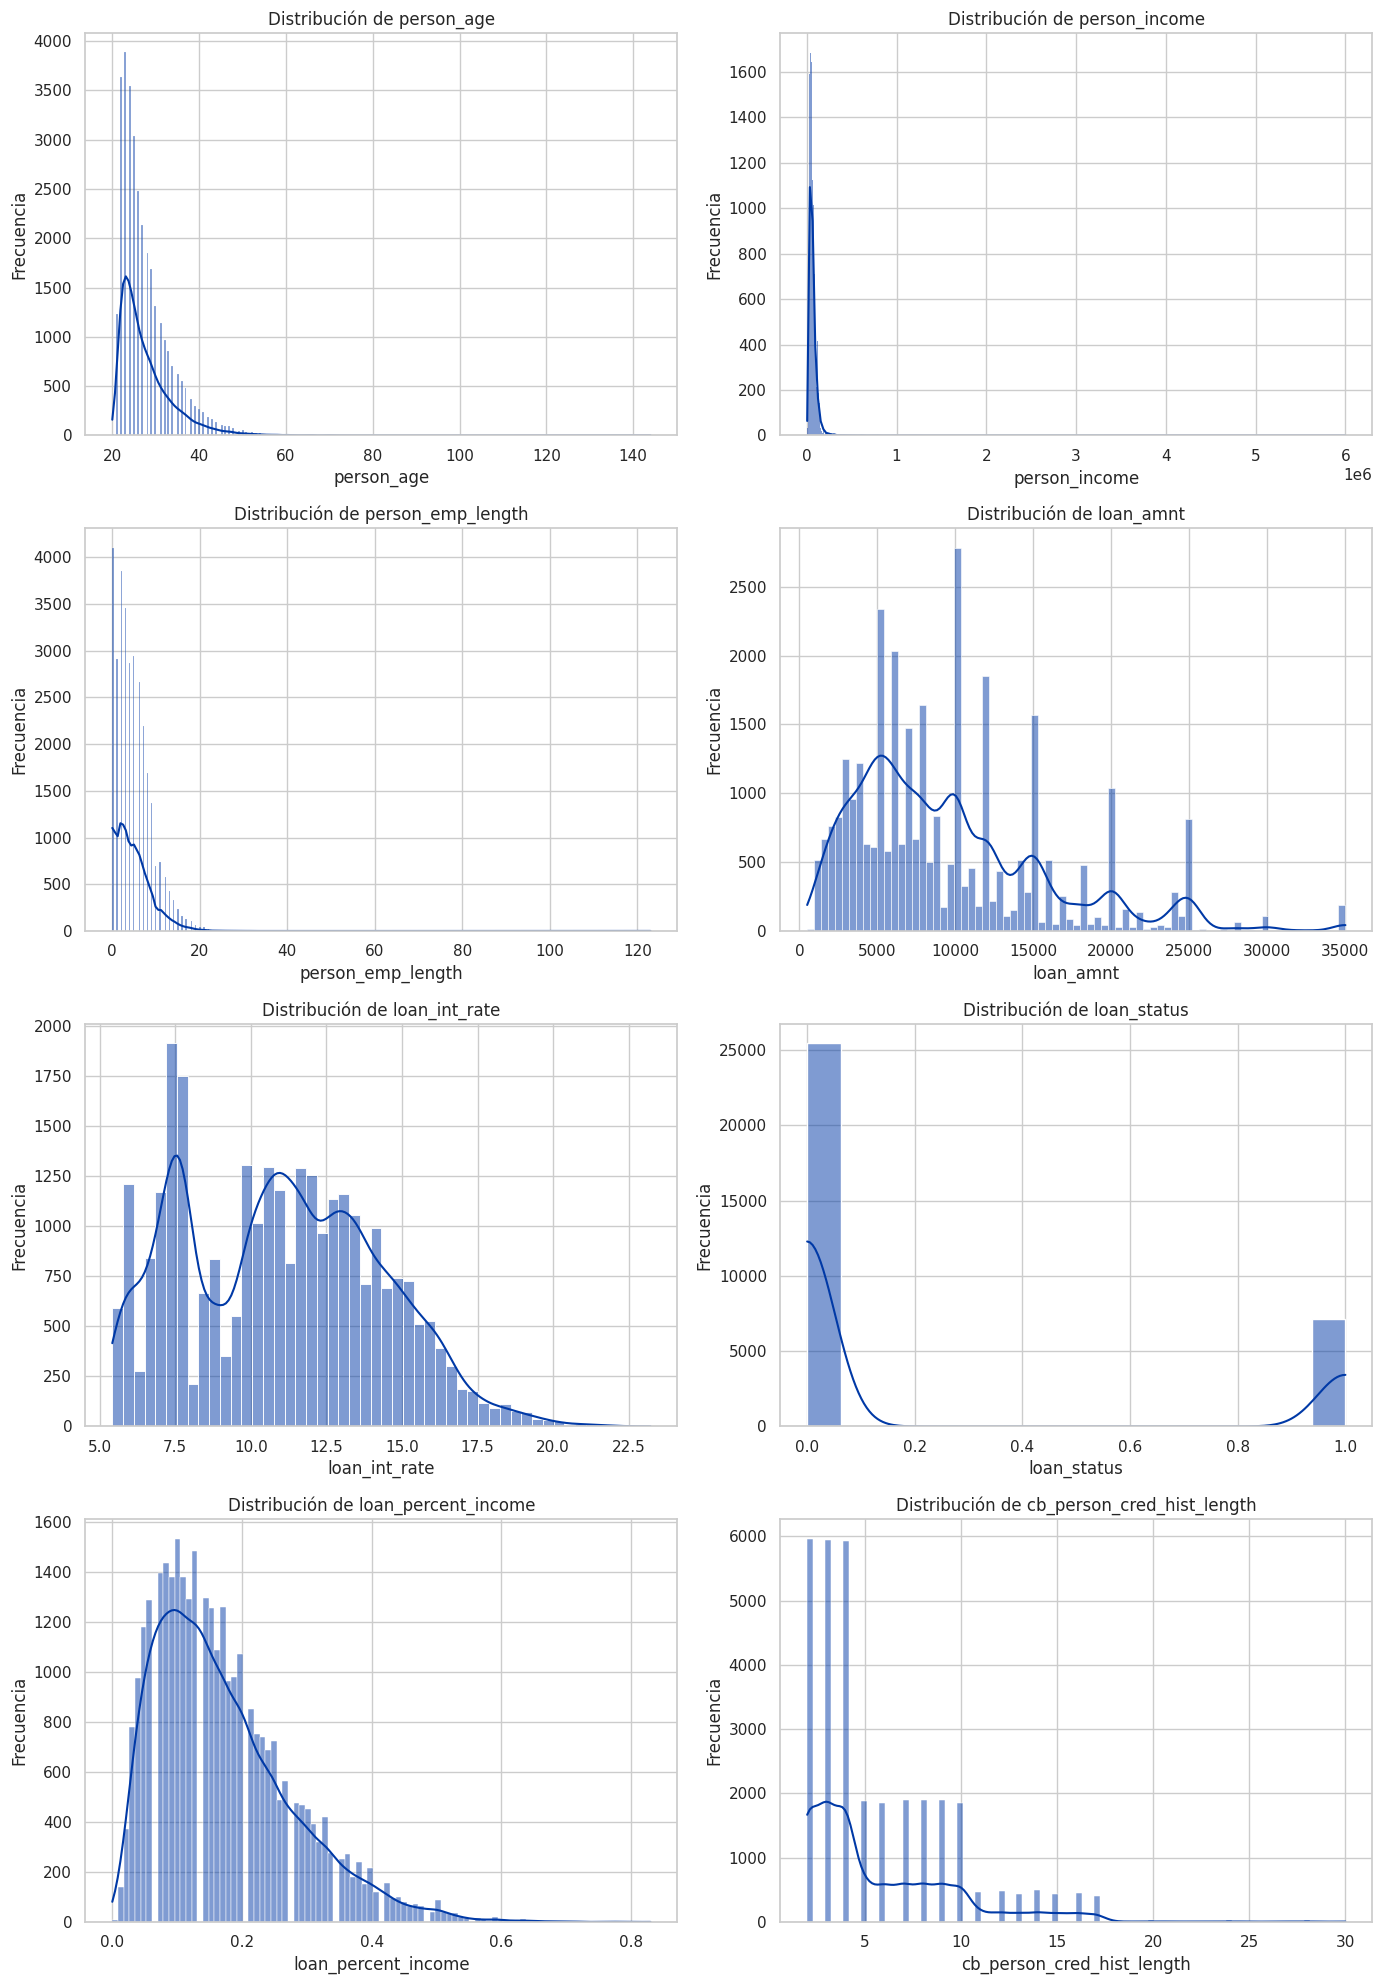

In [ ]:
# Configurar una figura grande para mostrar histogramas para todas las variables numéricas
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
axes = axes.flatten()  # Convertir la matriz de ejes en un array plano para iterar más fácilmente

column_titles = [col for col in df_numeric.columns]

for ax, col in zip(axes, column_titles):
    sns.histplot(df[col], kde=True, ax=ax, color='#0039A6')
    ax.set_title(f'Distribución de {col}', fontsize=12)
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# ¿Se corresponde con lo obtenido en el cálculo de asimetría?
**Si**

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

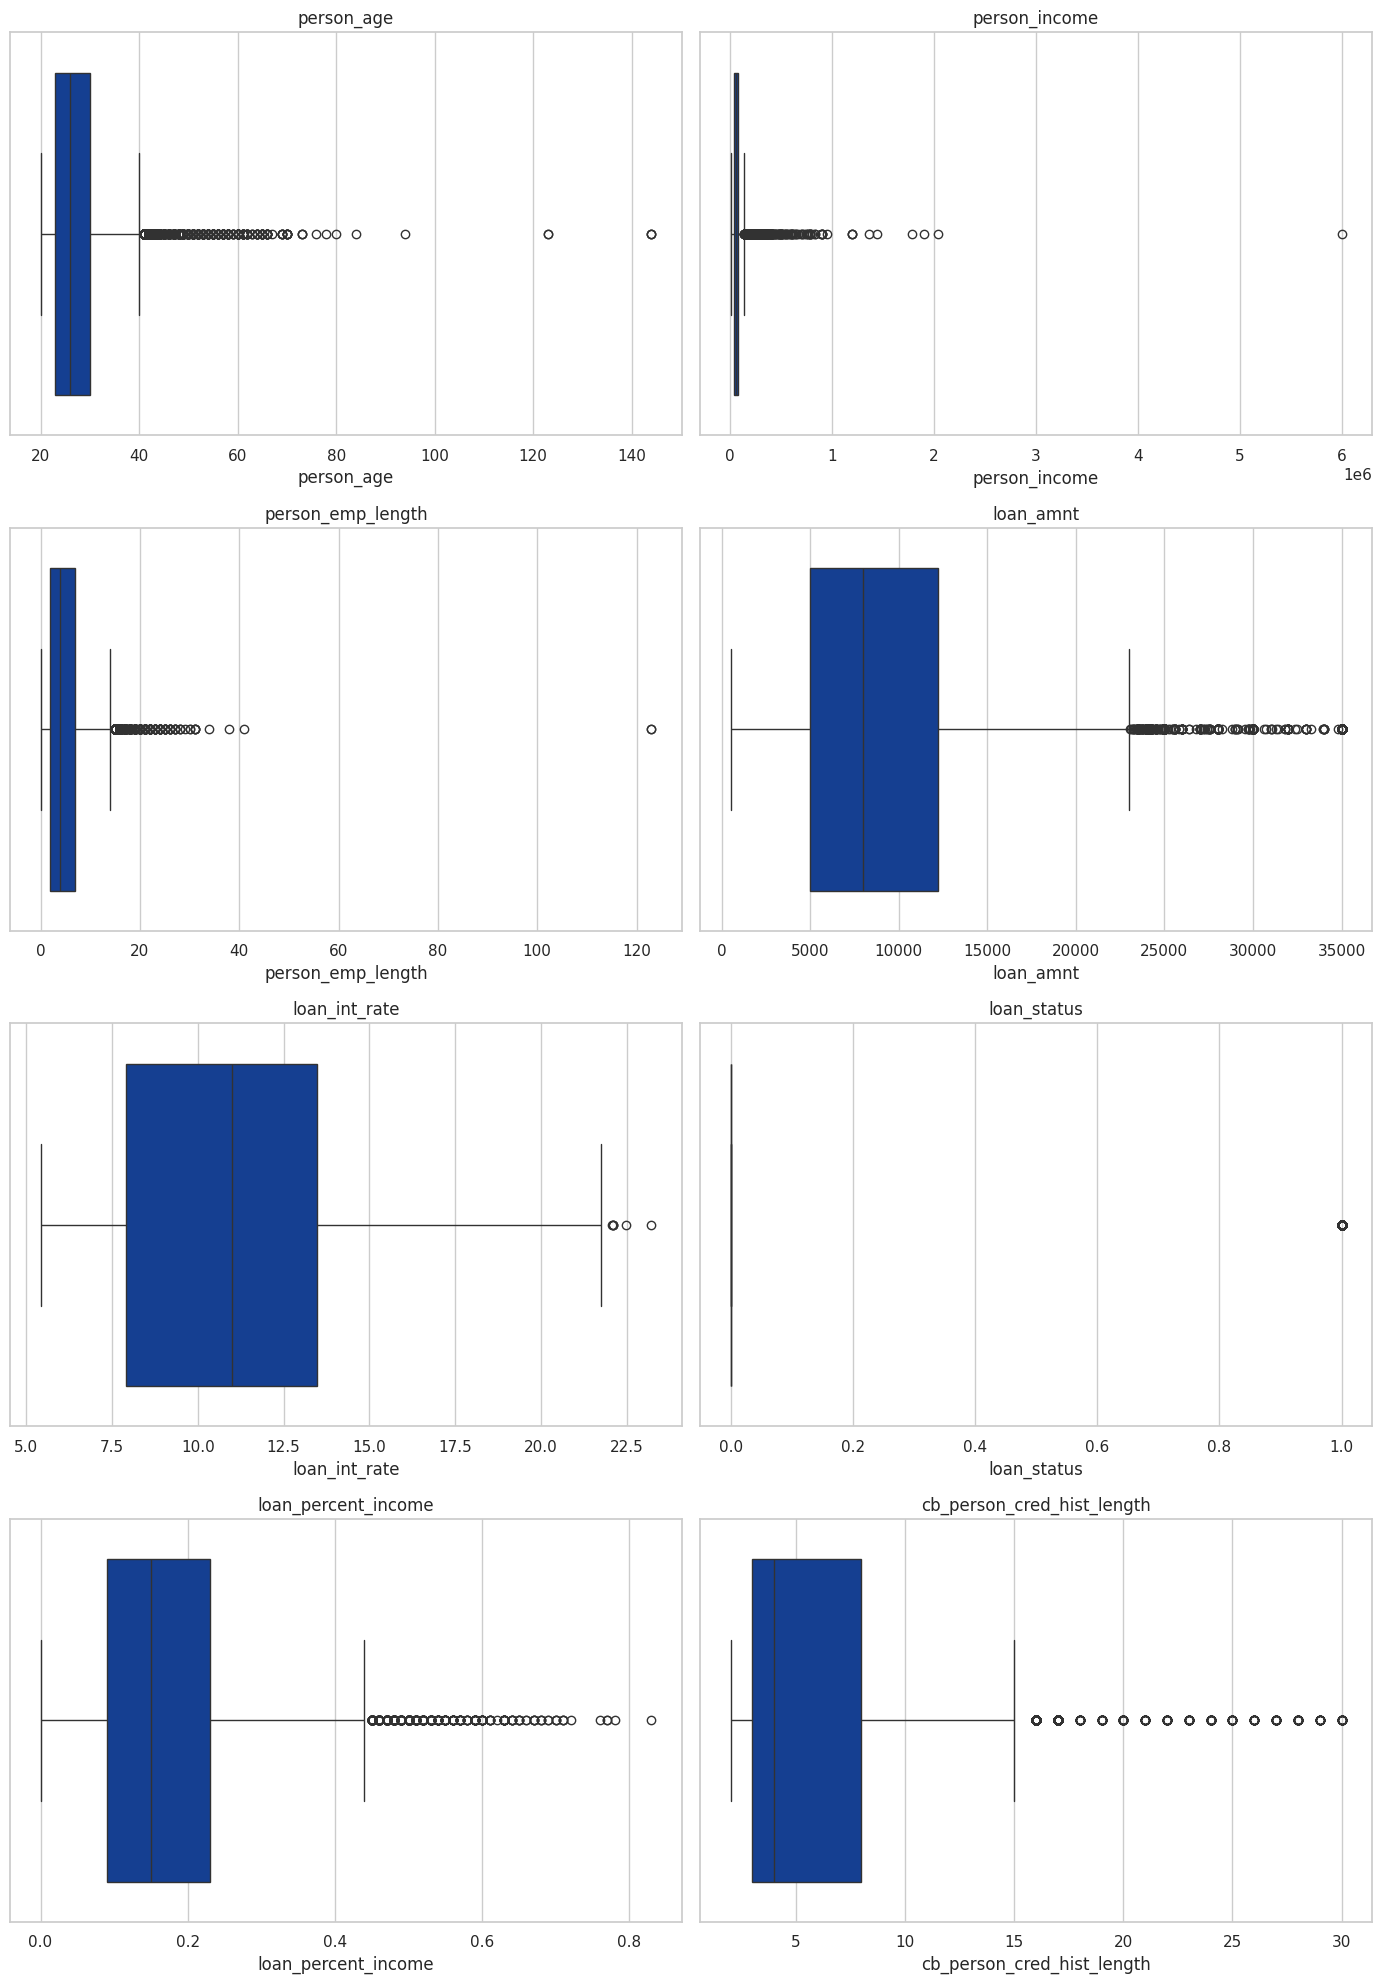

In [ ]:
# Configurar una figura grande para mostrar boxplots para todas las variables numéricas
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
axes = axes.flatten()  # Convertir la matriz de ejes en un array plano para iterar más fácilmente

# Crear un boxplot para cada variable numérica
for ax, col in zip(axes, column_titles):
    ax.set_title(f'{col}', fontsize=12)
    ax.set_xlabel('')
    sns.boxplot(x=df_numeric[col], ax=ax, color='#0039A6')


plt.tight_layout()
plt.show()

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [ ]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [ ]:
df_text_descriptive_stats = df.describe(include=['object'])

# Agregar moda y cardinalidad
df_text_descriptive_stats.loc['mode'] = df.select_dtypes(include=['object']).mode().iloc[0]
df_text_descriptive_stats.loc['cardinality'] = df.select_dtypes(include=['object']).nunique()

df_text_descriptive_stats

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836
mode,RENT,EDUCATION,A,N
cardinality,4,6,7,2


7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

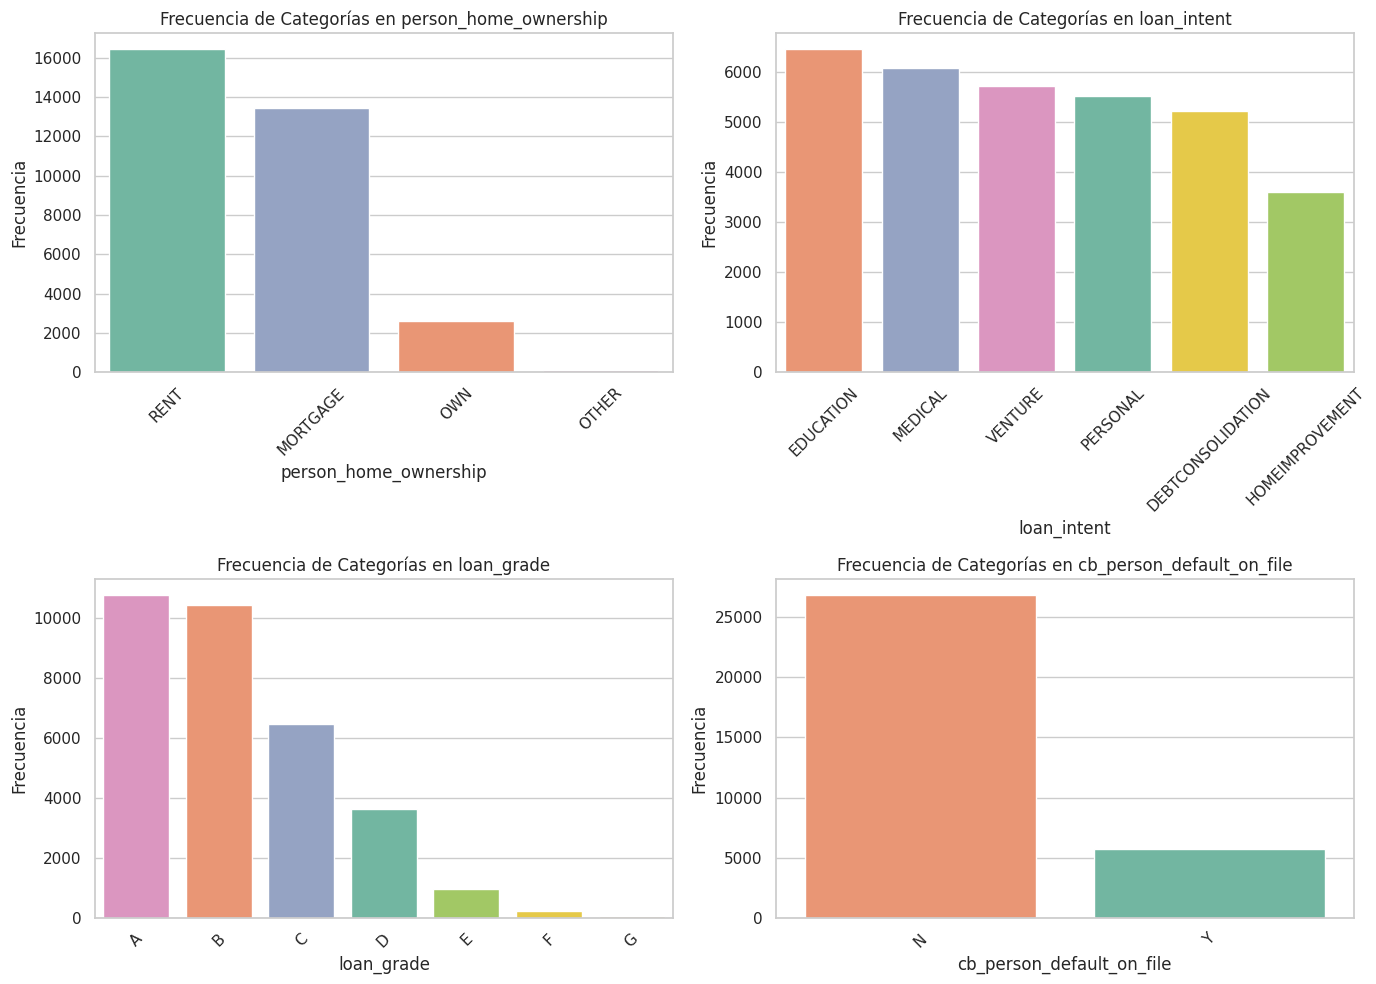

In [ ]:
# Configurar una figura grande para mostrar gráficos de barras para todas las variables de texto
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()  # Convertir la matriz de ejes en un array plano para iterar más fácilmente

text_columns = df.select_dtypes(include=['object']).columns

for ax, col in zip(axes, text_columns):
    palette = sns.color_palette("Set2", n_colors=df[col].nunique())  # Definir la paleta según el número de categorías únicas
    order = df[col].value_counts().index  # Ordenar las barras según su frecuencia

    sns.countplot(x=col, hue=col, data=df, ax=ax, order=order, palette=palette, dodge=False, legend=False)

    ax.set_title(f'Frecuencia de Categorías en {col}', fontsize=12)
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

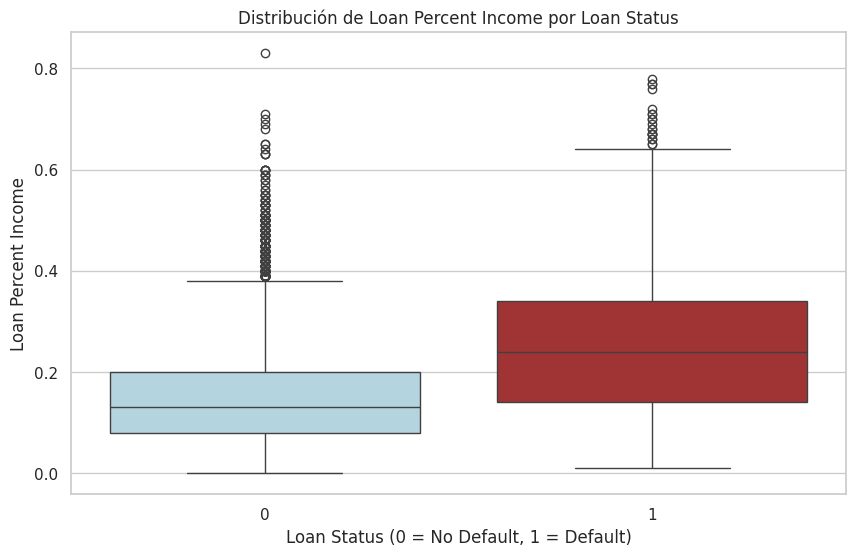

In [ ]:
palette = {0: 'lightblue', 1: 'firebrick'}  # Verde para no incumplimiento, Rojo para incumplimiento

plt.figure(figsize=(10, 6))
plt.title('Distribución de Loan Percent Income por Loan Status')
plt.xlabel('Loan Status (0 = No Default, 1 = Default)')
plt.ylabel('Loan Percent Income')

# Docs: https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x='loan_status', y='loan_percent_income', hue='loan_status', data=df, palette=palette, legend=False)

plt.show()

**Los préstamos que representan una mayor carga financiera (en términos de la proporción del ingreso) están más asociados con un mayor riesgo de incumplimiento.**

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

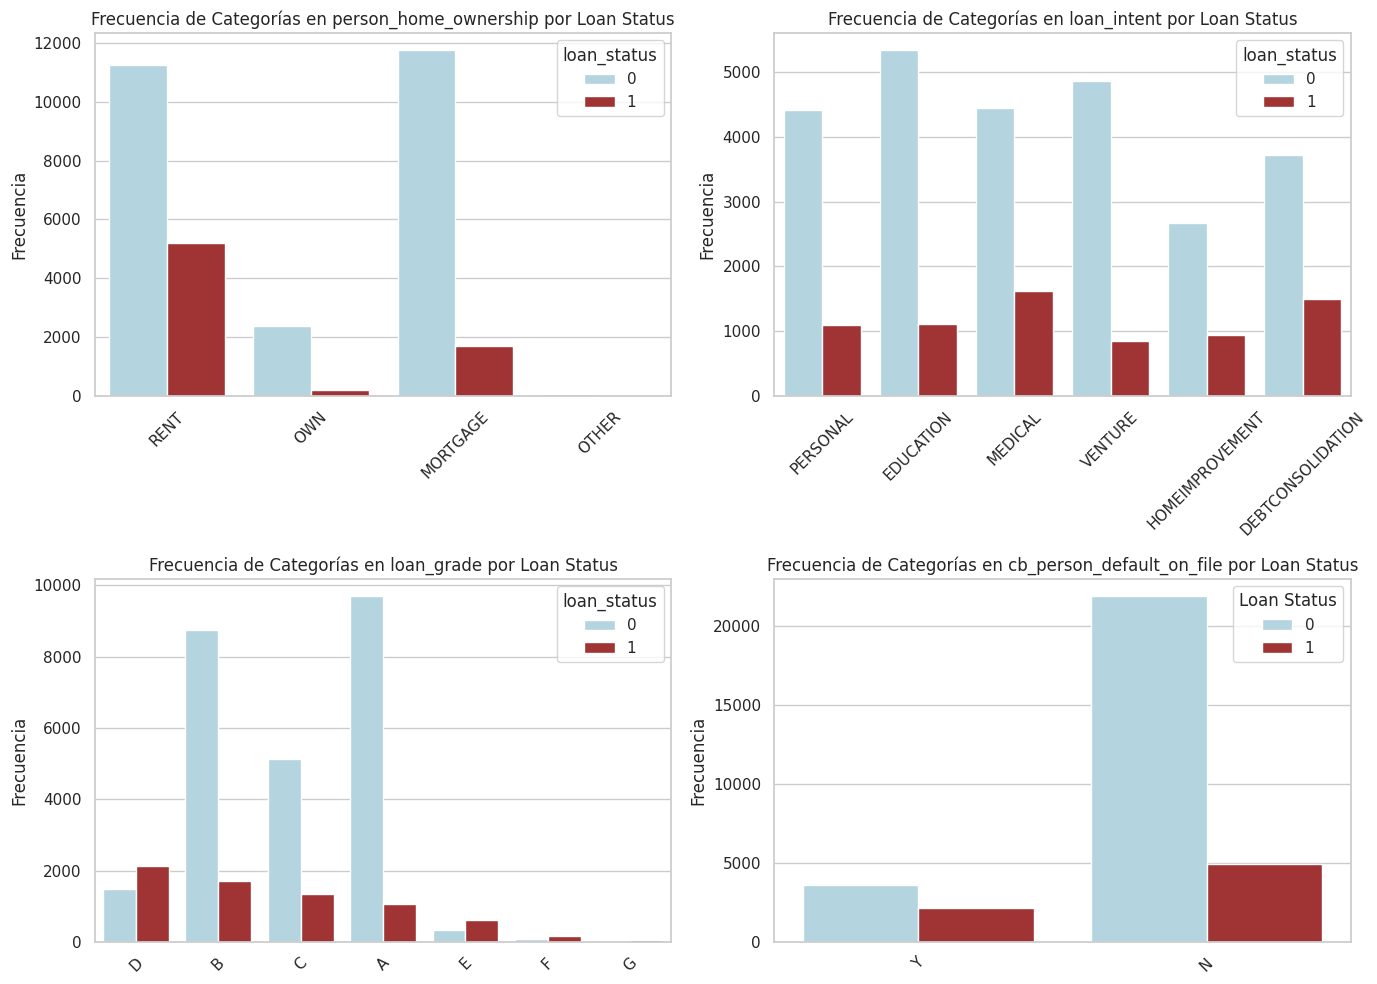

In [ ]:
# Configurar una figura grande para mostrar gráficos de barras para todas las variables de texto con hue para loan_status
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()  # Convertir la matriz de ejes en un array plano para iterar más fácilmente

palette = {0: 'lightblue', 1: 'firebrick'}  # Verde para no incumplimiento, Rojo para incumplimiento

# Títulos para los gráficos de barras
text_columns = df.select_dtypes(include=['object']).columns

# Crear un gráfico de barras para cada variable de texto utilizando loan_status como hue
for ax, col in zip(axes, text_columns):
    sns.countplot(x=col, hue='loan_status', data=df, ax=ax, palette=palette,)
    ax.set_title(f'Frecuencia de Categorías en {col} por Loan Status', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=45)

# Ajustar el layout para evitar superposiciones y mostrar la leyenda
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.show()

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

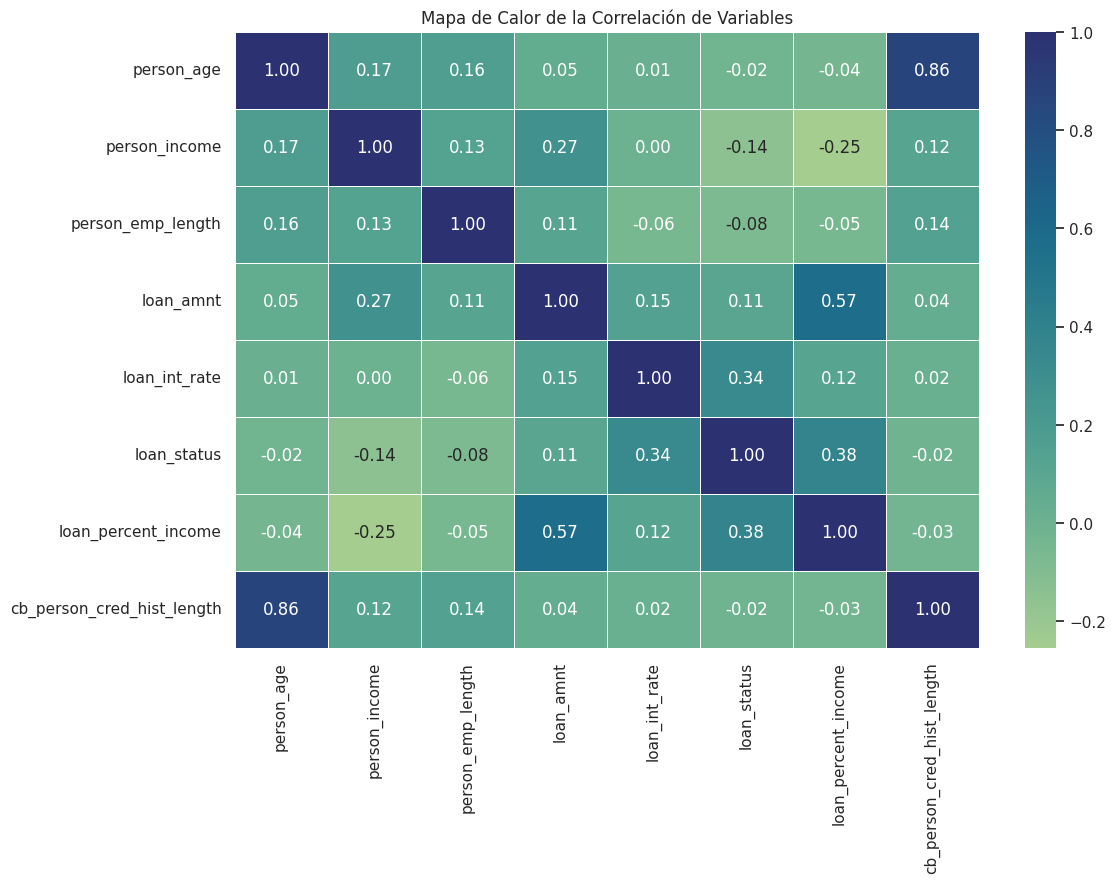

In [ ]:
# Seleccionar solo las columnas numéricas del DataFrame para calcular la correlación
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = df_numeric.corr()

# Configuración del gráfico de mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest', cbar=True, linewidths=.5)

plt.title('Mapa de Calor de la Correlación de Variables')

plt.show()

*¿Qué variable tiene mayor correlación con loan_status?*  **loan_percent_income** con un Coeficiente de correlación de **0.38**